<a href="https://colab.research.google.com/github/ranjeev3000/TensorFlow-Handson/blob/main/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolutional neural networks and Computer vision with Tensorflow

computer vision is a practice of writing algorithms which can discover patterns in visual data, such as the camera of a self driving car recognising the car in front.``

## Get the data

The images we are working with are from the Food 101 dataset
(101 different classes of food): https:''www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes( pizza & steak)

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-29 20:37:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   198MB/s    in 0.5s    

2023-01-29 20:37:23 (198 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]




## Inspect the Data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data
And for a computer vision project...this usually means vidualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in `{(dirpath)}`.")

There are 2 directories and 0 images in `pizza_steak`.
There are 2 directories and 0 images in `pizza_steak/train`.
There are 0 directories and 750 images in `pizza_steak/train/steak`.
There are 0 directories and 750 images in `pizza_steak/train/pizza`.
There are 2 directories and 0 images in `pizza_steak/test`.
There are 0 directories and 250 images in `pizza_steak/test/steak`.
There are 0 directories and 250 images in `pizza_steak/test/pizza`.


In [6]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
num_steak_images_train, num_steak_images_test

(750, 250)

To visualize our images, first let's get the class names programtically

In [7]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # create d a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class


  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlin
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['560503.jpg']
Image shape: (512, 512, 3)


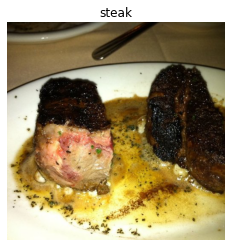

In [9]:
# View the random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

['3705479.jpg']
Image shape: (512, 512, 3)


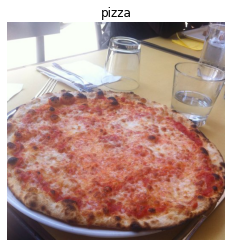

In [10]:
# View the random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
# the images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[157, 150, 166],
        [153, 149, 164],
        [152, 148, 163],
        ...,
        [ 89,  84, 106],
        [ 90,  82, 105],
        [ 95,  87, 110]],

       [[156, 149, 165],
        [153, 149, 164],
        [153, 149, 164],
        ...,
        [ 90,  85, 108],
        [ 94,  89, 112],
        [104,  99, 122]],

       [[155, 148, 164],
        [153, 149, 164],
        [154, 150, 165],
        ...,
        [ 88,  84, 109],
        [ 94,  90, 115],
        [105, 101, 126]],

       ...,

       [[ 49,  38,  44],
        [ 49,  38,  44],
        [ 48,  37,  43],
        ...,
        [164, 142, 103],
        [165, 143, 102],
        [164, 142, 101]],

       [[ 49,  38,  44],
        [ 48,  37,  43],
        [ 47,  36,  42],
        ...,
        [163, 141, 102],
        [166, 144, 105],
        [167, 145, 104]],

       [[ 48,  37,  43],
        [ 48,  37,  43],
        [ 47,  36,  42],
        ...,
        [162, 140, 10

In [12]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [13]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.61568627, 0.58823529, 0.65098039],
        [0.6       , 0.58431373, 0.64313725],
        [0.59607843, 0.58039216, 0.63921569],
        ...,
        [0.34901961, 0.32941176, 0.41568627],
        [0.35294118, 0.32156863, 0.41176471],
        [0.37254902, 0.34117647, 0.43137255]],

       [[0.61176471, 0.58431373, 0.64705882],
        [0.6       , 0.58431373, 0.64313725],
        [0.6       , 0.58431373, 0.64313725],
        ...,
        [0.35294118, 0.33333333, 0.42352941],
        [0.36862745, 0.34901961, 0.43921569],
        [0.40784314, 0.38823529, 0.47843137]],

       [[0.60784314, 0.58039216, 0.64313725],
        [0.6       , 0.58431373, 0.64313725],
        [0.60392157, 0.58823529, 0.64705882],
        ...,
        [0.34509804, 0.32941176, 0.42745098],
        [0.36862745, 0.35294118, 0.45098039],
        [0.41176471, 0.39607843, 0.49411765]],

       ...,

       [[0.19215686, 0.14901961, 0.17254902],
        [0.19215686, 0.14901961, 0.17254902],
        [0.18823529, 0

## An end-to-end example 


Let's Build a convolutional network to find patterns in our images, more specifically we need a way to:

* Load our Images
* Preprocess our images
* Compile our CNN
* Fit the CNN to our training data


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values b/w 0 & 1, also called as normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode= "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size =32,
                                               target_size=(224,224),
                                               seed=42)

# Build a CNN model(Same as the TinyVGG on the CNN explainer Website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our model
model_1.fit(train_data, 
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps= len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 302ms/step - loss: 0.5655 - accuracy: 0.7047 - val_loss: 1.0116 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4283 - accuracy: 0.8160 - val_loss: 1.1814 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3952 - accuracy: 0.8267 - val_loss: 1.1452 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3855 - accuracy: 0.8307 - val_loss: 1.0793 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3483 - accuracy: 0.8487 - val_loss: 1.6095 - val_accuracy: 0.5000


In [15]:
train_datagen

In [16]:
valid_datagen

In [17]:
len(train_data)

47

In [18]:
len(valid_data)

16

In [19]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the Tensorflow playgrounds:



In [20]:
train_data

In [21]:
# set random seed
tf.random.set_seed(42)

# Create  a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 182ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


In [22]:
# Get a summary of model 2
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite havinhg 20x more parmeters in model_2 compared to model_1, model_2 performs terribly. Let's try another approach.

In [23]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

# cxompile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 2.7105 - accuracy: 0.6287 - val_loss: 2.6627 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 1.0003 - accuracy: 0.6773 - val_loss: 1.8547 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6274 - accuracy: 0.7287 - val_loss: 1.3758 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6364 - accuracy: 0.7433 - val_loss: 1.6752 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4412 - accuracy: 0.8007 - val_loss: 1.4185 - val_accuracy: 0.5000


In [24]:
# Get model_3.summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (Visualize, visualize, visualize)
2. Preprocess the Data (prepared it for our model, the main step here was scaling/normalizing).
3. create a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust Different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

  ### 1.BECOME ONE WITH THE DATA

1.   List item
2.   List item



['1295457.jpg']
Image shape: (512, 512, 3)
['2291093.jpg']
Image shape: (512, 512, 3)


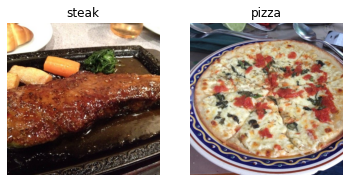

In [25]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## 2. Preprocess the data (Prepare it for a model)

In [26]:
# Define our Directory Dataset path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

our next step is to turn our data into  **batches** 

A abtch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time


It does this for a couple of reasons:
1. 10000 images(or more) might not fit into the memory of our processor (GPU).
2. Try to learn patterns of 10000 images in one fit would result in the model not being able to learn very well.



In [27]:
!nvidia-smi

Sun Jan 29 20:40:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    31W /  70W |   2420MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [29]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             class_mode="binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get a sample of train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [31]:
# How many batches are there
len(train_data)

47

In [32]:
1500/32

46.875

In [33]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [34]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you set up when beginning a machine learning  experiment and \then as you keep experimentinhg, you try to beat the baseline.

In [35]:
# Make the creating of our model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [36]:
# Create the model (this will be our baseline, a layer conv network)
model_4 = Sequential([
    Conv2D(filters=10,kernel_size =3,
           strides=1,
           padding='valid',
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10,3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification, so only one output neuron)
])



In [37]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [38]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Step 4. Fit the model

In [39]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [40]:
# Fit the model
history_4 = model_4.fit(train_data , # This is a combination of lable=s and sam[le data
                        epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 1.1969 - accuracy: 0.6547 - val_loss: 0.4688 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4598 - accuracy: 0.7920 - val_loss: 0.3933 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3520 - accuracy: 0.8507 - val_loss: 0.4407 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.2548 - accuracy: 0.9053 - val_loss: 0.3829 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.1457 - accuracy: 0.9520 - val_loss: 0.5994 - val_accuracy: 0.7880


### 5. Evaluating the model
It's look like our model is learning something. So let's evaluate

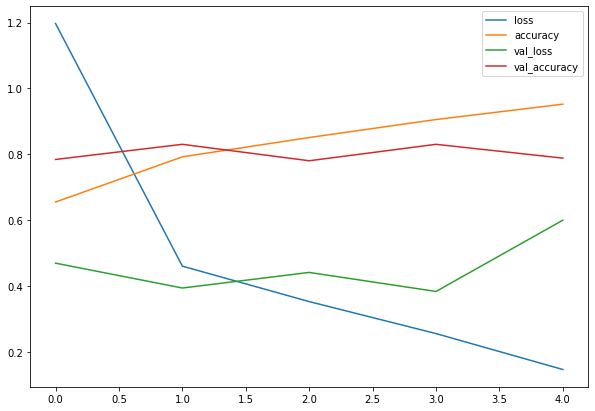

In [41]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [42]:
# Plot the validation and training curve seperately
def plot_loss_curve(history):
  """
  Returns seperaate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history['val_loss']
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))  # How many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label=["training_loss"])
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val accuracy")
  plt.title("Accueacy")
  plt.xlabel("Epochs")
  plt.legend()

In [43]:
history_4.history

{'loss': [1.1969406604766846,
  0.45975714921951294,
  0.35204368829727173,
  0.254810094833374,
  0.1456582248210907],
 'accuracy': [0.6546666622161865,
  0.7919999957084656,
  0.8506666421890259,
  0.9053333401679993,
  0.9520000219345093],
 'val_loss': [0.4687904119491577,
  0.3932962119579315,
  0.4406763017177582,
  0.382858544588089,
  0.5994146466255188],
 'val_accuracy': [0.7839999794960022,
  0.8299999833106995,
  0.7799999713897705,
  0.8299999833106995,
  0.7879999876022339]}

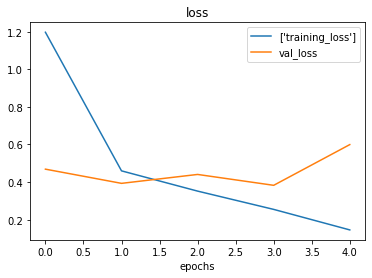

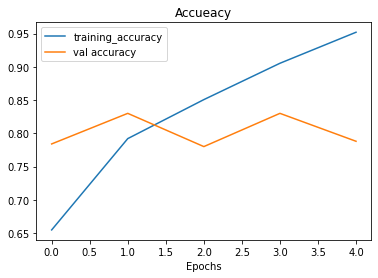

In [44]:
# Plot the curve
plot_loss_curve(history_4)

The above representation clearly shows that the model is overfitted ont he training dataset as the valiodation loss is increasing and validation accuracy is decreasing ater certain numner of epochs

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

Ways to reduce overfitting

* Increase the number of conv layers.
* Increase the number of conv filters
* Add another dense layer to the output of flattened layer


Reduce overfitting:
* Add data augmentation
* Add regularisation layers (sucha s MaxPool2D)
* Add more data....


**Note**: Reducing overfitting is also known as **regularzation**.

In [45]:
# Creat the model (this going to be our new baseline)

model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [46]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [47]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.6208 - accuracy: 0.6513 - val_loss: 0.4703 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4792 - accuracy: 0.7847 - val_loss: 0.4156 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4692 - accuracy: 0.7880 - val_loss: 0.3750 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4205 - accuracy: 0.8127 - val_loss: 0.3737 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4044 - accuracy: 0.8220 - val_loss: 0.3993 - val_accuracy: 0.8320


In [48]:
# Get a summary of model with MaxPooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [49]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [50]:
# model_5 has 53x less partameters compared to model-4, but it still outperforms it in terms of performance.
477341/8861

53.86987924613475

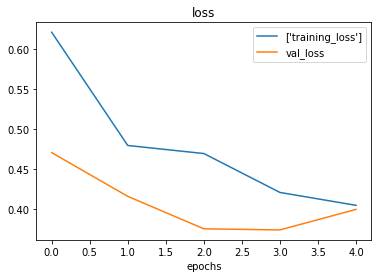

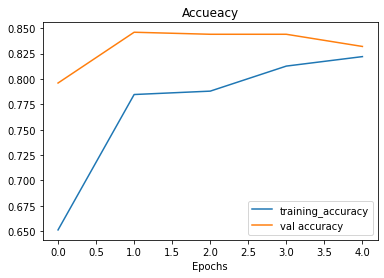

In [51]:
# Plot loss curves
plot_loss_curve(history_5)

### Opening our bag of tricks and finding daat augmentation

In [52]:
# Create ImageDataGenerator training instance with data augmentation:
train_daatgen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # How much do you want to rotate an image
                                             shear_range=0.2, # how much do you want to shear an image
                                             zoom_range=0.2, # Zoom in randomly an image
                                             width_shift_range=0.2, # move an image around the x-axis
                                             height_shift_range=0.3, # move sn image around the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGEnerator without data augmentation
trsin_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_dataset = ImageDataGenerator(rescale = 1/255.)

**Question**: What is data augmentation?

Data augmentation is the process of alerting or training our data, leading it to have more diversity and in turn allowing our models to learn more generalizable(hopefully) patterns.
Alerting migh tmean adjusting the rotation of an image, flipping it, cropping it or something similar.



Let's write some code to visualize data augmentation:

In [53]:
# Import daat and augment it from training directory
print("Augmented training data")
train_data_augmented = train_daatgen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purposes only

# Create non-augmented train data batches
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
IMG_SIZE = (224,224)
# Create non-augmented test data
print("Non-Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = 32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


**Note:** Data Augmentation is usually only performed on the training data. Using `ImageDaatGeneerator` built-in-data augmentation parameterd our images are left as they are in the directories but are modified as they're loaded in the model.

Finally, let's visualize some augmented data

In [54]:
# Geta sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented. next() # note: labels aren't augmented...only data (images)

showing image number: 20


(-0.5, 223.5, 223.5, -0.5)

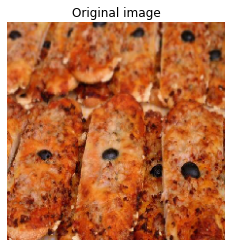

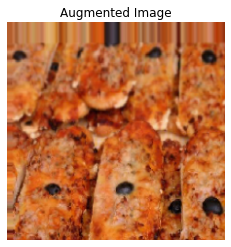

In [55]:
# Show originaal images Nd ugmented images
import random
random_number = random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

Now we've seen what augmented training data looks like. 
Let;s build am odel and see hoe it learns

In [56]:
# Create a model (same as modl_5)
model_6 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,  # Fitting model_6 on augmented_training_data
                        epochs = 5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 480ms/step - loss: 0.7367 - accuracy: 0.4680 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6764 - val_accuracy: 0.6800
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6962 - accuracy: 0.5133 - val_loss: 0.6798 - val_accuracy: 0.6880
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6911 - accuracy: 0.5227 - val_loss: 0.6771 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6858 - accuracy: 0.5807 - val_loss: 0.6536 - val_accuracy: 0.7320


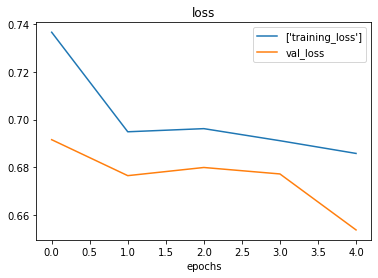

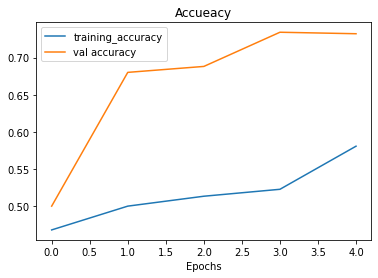

In [57]:
# Check our model_6 training curves
plot_loss_curve(history_6)

Let's shuffle our  augmented training data and trsin another model (the same as before) on it and see what happens

In [58]:
# Import data and augment it and shuffle it
train_data_augmented_shuffled = train_daatgen_augmented.flow_from_directory(train_dir,
                                                                          target_size =(224,224),
                                                                          class_mode="binary",
                                                                          batch_size=32,
                                                                          shuffle=True) 

Found 1500 images belonging to 2 classes.


In [59]:
# Create the model same as model_5 and model_6
model_7 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
           
])

In [60]:
# Compile thw model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data= test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 479ms/step - loss: 0.6519 - accuracy: 0.6073 - val_loss: 0.5594 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5537 - accuracy: 0.7140 - val_loss: 0.4749 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.4968 - accuracy: 0.7747 - val_loss: 0.4547 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5023 - accuracy: 0.7660 - val_loss: 0.3442 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4745 - accuracy: 0.7827 - val_loss: 0.3324 - val_accuracy: 0.8600


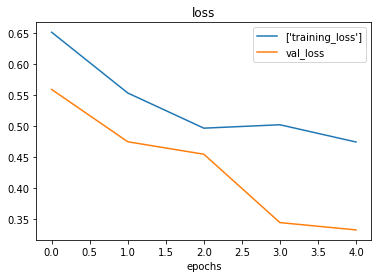

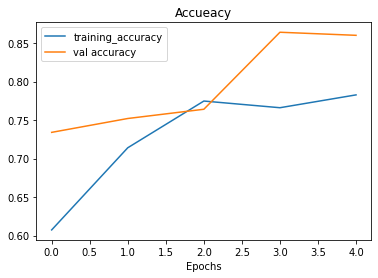

In [61]:
# Plot loss curves
plot_loss_curve(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline. There are few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more ` Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* FInd an ideal learning rate
* Get more data (give the model more opportunity to learn)

* Use **transfer learning** to leverage what another model has learn and adjust it for our own use case

## Making a prediction with our trained model on our custom data

In [62]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-01-29 20:45:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-01-29 20:45:28 (50.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

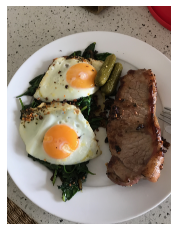

In [63]:
# view our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [64]:
# Check the shape of our image
steak.shape 

(4032, 3024, 3)

In [65]:
expanded_steak = tf.expand_dims(steak,axis = 0).shape
expanded_steak

TensorShape([1, 4032, 3024, 3])

In [66]:
# Create a function to import an image and resize it to be able to used with out model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour channels).
  """
  # readi in the image
  img = tf.io.read_file(filename)
  # decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size =[img_shape, img_shape])
  # Rescale the image and get all values b/w 0 and 1
  img = img/255.
  return img

In [67]:
# Load and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [68]:
# Predict the output
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 177ms/step


array([[0.90292007]], dtype=float32)

Looks like our custom image is being put through our model,
however it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction

In [69]:
# remind ourselves of our classs names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [70]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [71]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model 
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))
  print(pred)

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 17ms/step
[[0.90292007]]


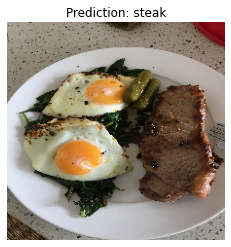

In [72]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2023-01-29 20:45:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-01-29 20:45:31 (60.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 17ms/step
[[0.44551957]]


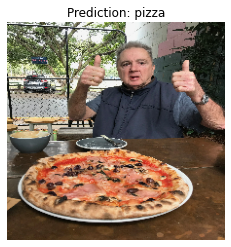

In [73]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

Though prediction of pizza in above image is wrong, you can see that prediction probability is near 0.5 (0.5858), Hence the model need more training and needs to improve its accuracy

# Multi-class Image Classification

We've just been through a bunch of the following steps in Binary classification problem (Pizza vs. Steak), now we're going to step things up a notch ith 10 classes of food (multi-class classification).

1. Become one with the Data
2. Preprocess the data (get it ready for a model)
3. Create a model(start with a baseline)
4. Fit the model( Overfit testing to make sure it works)
5. Evsluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/ reduce overfitting)
7. Repeat Until Satisfied

## 1. Import and become one with the data

In [74]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-01-29 20:45:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 142.250.99.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  98.4MB/s    in 4.9s    

2023-01-29 20:45:36 (102 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [75]:
import os

# walk through 10 classes of food imagr data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in `{dirpath}`")

There are 2 directories and 0 images in `10_food_classes_all_data`
There are 10 directories and 0 images in `10_food_classes_all_data/train`
There are 0 directories and 750 images in `10_food_classes_all_data/train/ice_cream`
There are 0 directories and 750 images in `10_food_classes_all_data/train/fried_rice`
There are 0 directories and 750 images in `10_food_classes_all_data/train/steak`
There are 0 directories and 750 images in `10_food_classes_all_data/train/ramen`
There are 0 directories and 750 images in `10_food_classes_all_data/train/pizza`
There are 0 directories and 750 images in `10_food_classes_all_data/train/hamburger`
There are 0 directories and 750 images in `10_food_classes_all_data/train/grilled_salmon`
There are 0 directories and 750 images in `10_food_classes_all_data/train/chicken_wings`
There are 0 directories and 750 images in `10_food_classes_all_data/train/chicken_curry`
There are 0 directories and 750 images in `10_food_classes_all_data/train/sushi`
There are 1

In [76]:
# Setup trsin and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [77]:
# Visualize, Visualize, Visualize
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3464182.jpg']
Image shape: (512, 384, 3)


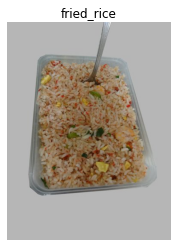

In [78]:
img= view_random_image(target_dir= train_dir,
                       target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for model)

In [79]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size=32,
                                             class_mode='categorical'
                                             )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [80]:
len(train_data), len(test_data)

(235, 79)

In [81]:
7500/32,2500/32

(234.375, 78.125)

### 3. Create a model (start with a baseline)

We've been talking a lot about the cNN explainer website....how about we just take their model(also on 10 classes) and use it for our problem...?

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


# Create our model very similar to previous model but actually same as CNN website
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")  # Change of 10 output neurons and use of activation Softmax

])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [106]:
# Fit our model
history_8 = model_8.fit(train_data, # Now 10 different classes
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 201ms/step - loss: 2.1093 - accuracy: 0.2333 - val_loss: 1.9346 - val_accuracy: 0.3228
Epoch 2/5
235/235 [==============================] - 47s 199ms/step - loss: 1.8013 - accuracy: 0.3935 - val_loss: 1.7979 - val_accuracy: 0.3764
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.4436 - accuracy: 0.5259 - val_loss: 1.8733 - val_accuracy: 0.3608
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 0.8220 - accuracy: 0.7328 - val_loss: 2.2854 - val_accuracy: 0.3096
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.2816 - accuracy: 0.9159 - val_loss: 3.1947 - val_accuracy: 0.3016


### 5. Evaluate the model

In [107]:

# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 3.1947 - accuracy: 0.3016


[3.1946604251861572, 0.30160000920295715]

In [108]:
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_3 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_37 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

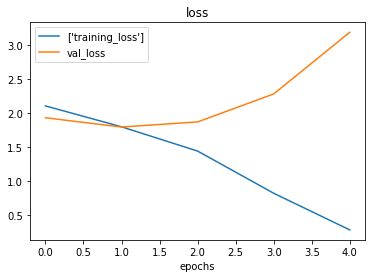

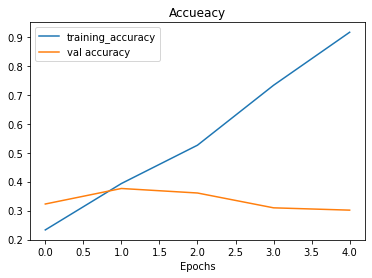

In [109]:
# Check out the model loss curves
plot_loss_curve(history_8)

What do these loss curves tell us....

Well....It seems like our model is **overfitting** the training set quite badly...in other words, it's getting great results on the training data but fails to generate well to unseen data and performs poorly on test dataset.

### Adjust model hyperparameters (to beat our baseline/reduce overfitting)

Due to its performance on trining data, it's clear our model is learning something....

However it's not generalizing well to unseen data (overfitting).

So let's try to fix overfitting by....

* **Get more data** - Having more data gives the model more opportunity to learn diverse patterns.
* **Simplify the model** = If our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use Data Augmentation*** = data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use Transfer Learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your similar dataset.

In [110]:
# How about we try out simplify our model first
# Let's try to remove a convolution layer
model_9 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

In [111]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 29160)             0         
                                                                 
 dense_17 (Dense)            (None, 10)              

In [112]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 187ms/step - loss: 2.1069 - accuracy: 0.2521 - val_loss: 1.8891 - val_accuracy: 0.3432
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.6928 - accuracy: 0.4309 - val_loss: 1.8687 - val_accuracy: 0.3424
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.2957 - accuracy: 0.5823 - val_loss: 1.9693 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 0.8117 - accuracy: 0.7504 - val_loss: 2.1613 - val_accuracy: 0.3240
Epoch 5/5
235/235 [==============================] - 54s 230ms/step - loss: 0.4211 - accuracy: 0.8945 - val_loss: 2.5769 - val_accuracy: 0.3092


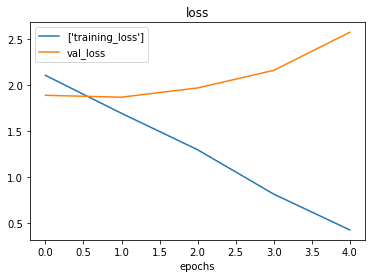

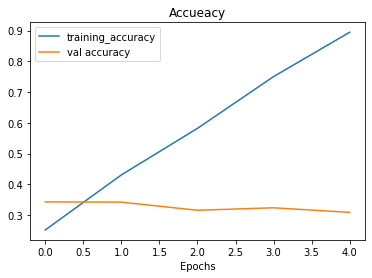

In [113]:
# check out the loss curves of model_9
plot_loss_curve(history_9)

Looks like "our simplifying the model" didn't work

How about we try data augmentation??

### Trying to redce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data....

Ideally, we want to:
* Reduce overfitting (get the train and validation loss closer)
* Improve validation accuracy

In [115]:
# Create an augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale =1/255.,
                                          rotation_range = 0.2,
                                          width_shift_range=0.2,
                                          height_shift_range= 0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                               target_size=(224,224),
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [116]:
# Let's create another model. But this time we fit on the augmented data

# Let's clone model_8, since we are building a model with same architecture
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model using the same setup as previous model
model_10.compile(loss="categorical_crossentropy",
                 optimizer = Adam(),
                 metrics=["accuracy"])

In [117]:
model_10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_3 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_37 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [118]:
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_3 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_37 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [120]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 484ms/step - loss: 2.2250 - accuracy: 0.1736 - val_loss: 2.1311 - val_accuracy: 0.2156
Epoch 2/5
235/235 [==============================] - 113s 480ms/step - loss: 2.1267 - accuracy: 0.2253 - val_loss: 2.0039 - val_accuracy: 0.2796
Epoch 3/5
235/235 [==============================] - 113s 480ms/step - loss: 2.0554 - accuracy: 0.2751 - val_loss: 1.9134 - val_accuracy: 0.3192
Epoch 4/5
235/235 [==============================] - 113s 481ms/step - loss: 1.9905 - accuracy: 0.3048 - val_loss: 1.8375 - val_accuracy: 0.3692
Epoch 5/5
235/235 [==============================] - 112s 475ms/step - loss: 1.9465 - accuracy: 0.3261 - val_loss: 1.7942 - val_accuracy: 0.3908


In [121]:
model_10.evaluate(test_data)

79/79 [==============================] - 15s 193ms/step - loss: 1.7942 - accuracy: 0.3908


[1.7942167520523071, 0.39079999923706055]

In [122]:
model_9.evaluate(test_data)

79/79 [==============================] - 15s 187ms/step - loss: 2.5769 - accuracy: 0.3092


[2.576937437057495, 0.3091999888420105]

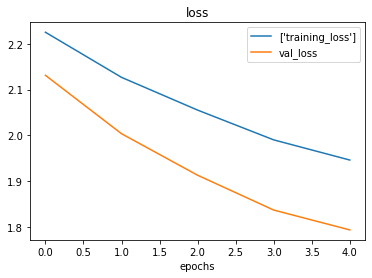

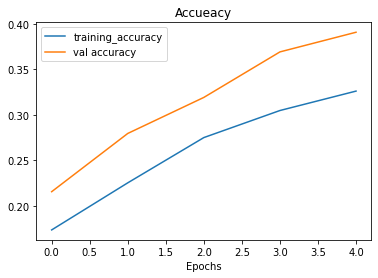

In [123]:
# Plot loss curve with model trained on augmented data
plot_loss_curve(history_10)

Note: That looks much better, loss curves are closer to each other compared to the base model, so if we trained for longer period, we might see an increase in accuracy as well.

### 7. repeat until satisfied

We could keep going here...continually trying to build our lossc urves closer together and trying to improve our vslidation/trst accuracy

How?

By running lots of experiments, nmely:
- restructuring our model's architecture (increasing layers/ hidden units)
- adjust learning rate
- try different methods of data augmentation (adjust the hyperpatameters in our ImageDataGenerators)
- try to train longer, 10 epochs instead of 5 epochs
- try transfer learning

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [128]:
# remind overselves of the classes on which our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [129]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-01-29 22:39:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.05s   

2023-01-29 22:39:46 (63.8 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2023-01-29 22:39:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [135]:
# reconfig our pred_and_plot function to work with multiclass images
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model 
  and plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))
  print(pred)

  # Add in logic for multi-class
  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class (for binary classification)
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 17ms/step
[[0.08848601 0.07388271 0.1687897  0.09999648 0.06465796 0.01165667
  0.16023044 0.20352167 0.08585386 0.04292463]]


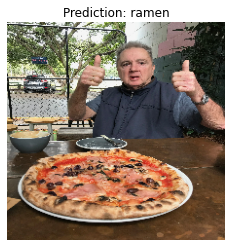

In [137]:
# Make a prediction using model_10
pred_and_plot(model_10,
              '03-pizza-dad.jpeg',
              class_names=class_names)

In [138]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 [==============================] - 0s 23ms/step
[[0.07860439 0.15030432 0.02037106 0.07096662 0.05846903 0.10939344
  0.1266243  0.05375111 0.08927608 0.24223965]]


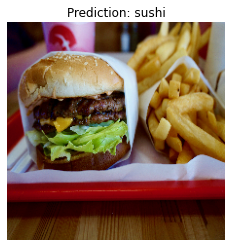

In [140]:
pred_and_plot(model_10,
              '03-hamburger.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 15ms/step
[[0.03367383 0.07646151 0.03740893 0.18940811 0.09670391 0.05664214
  0.03061392 0.08464704 0.3378242  0.05661639]]


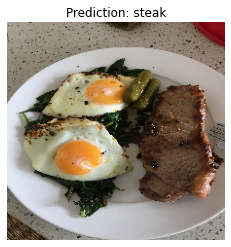

In [141]:
pred_and_plot(model_10,
              '03-steak.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 23ms/step
[[0.2210648  0.17372204 0.02958498 0.16309182 0.04611034 0.00977948
  0.1883712  0.04262285 0.05286372 0.07278886]]


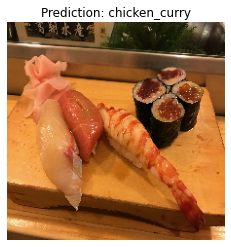

In [142]:
pred_and_plot(model_10,
              '03-sushi.jpeg',
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test dataset. So we can expect it to custom quite poorly on other unseen data.

### Saving and loading our model


In [146]:
# Save a model:
model_10.save("saved_train_model_10")

In [147]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_train_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 1.7942 - accuracy: 0.3908


[1.7942167520523071, 0.39079999923706055]

In [149]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 1.7942 - accuracy: 0.3908


[1.7942166328430176, 0.39079999923706055]